In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

sns.set(style = 'white')


**Lecture du fichier de données**

In [2]:
telecom_cust = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Affichage des 5 premières lignes du DataFrame pour avoir un aperçu des données
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Affichage des noms de colonnes du DataFrame
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

**Exploration des données pour voir s'il y a des valeurs manquantes.**

In [5]:
# Affichage du type de chaque colonne
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Conversion de la colonne 'TotalCharges' en type numériqu
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
# Comptage du nombre de valeurs manquantes pour chaque colonne
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Après avoir examiné le résultat ci-dessus, j'ai constaté qu'il y a 11 valeurs manquantes pour les charges totales. je vais remplacer ces 11 lignes de notre ensemble de données 

In [7]:
# Suppression des lignes contenant des valeurs manquantes
telecom_cust.dropna(inplace = True)

# Création d’un nouveau DataFrame sans la première colonne
df2 = telecom_cust.iloc[:,1:]

# Conversion de la variable cible 'Churn' en format numériqu
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Transformation des variables catégorielles en variables numériques
df_dummies = pd.get_dummies(df2)
df_dummies.head()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_15976\1765062392.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_15976\1765062392.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


<Axes: >

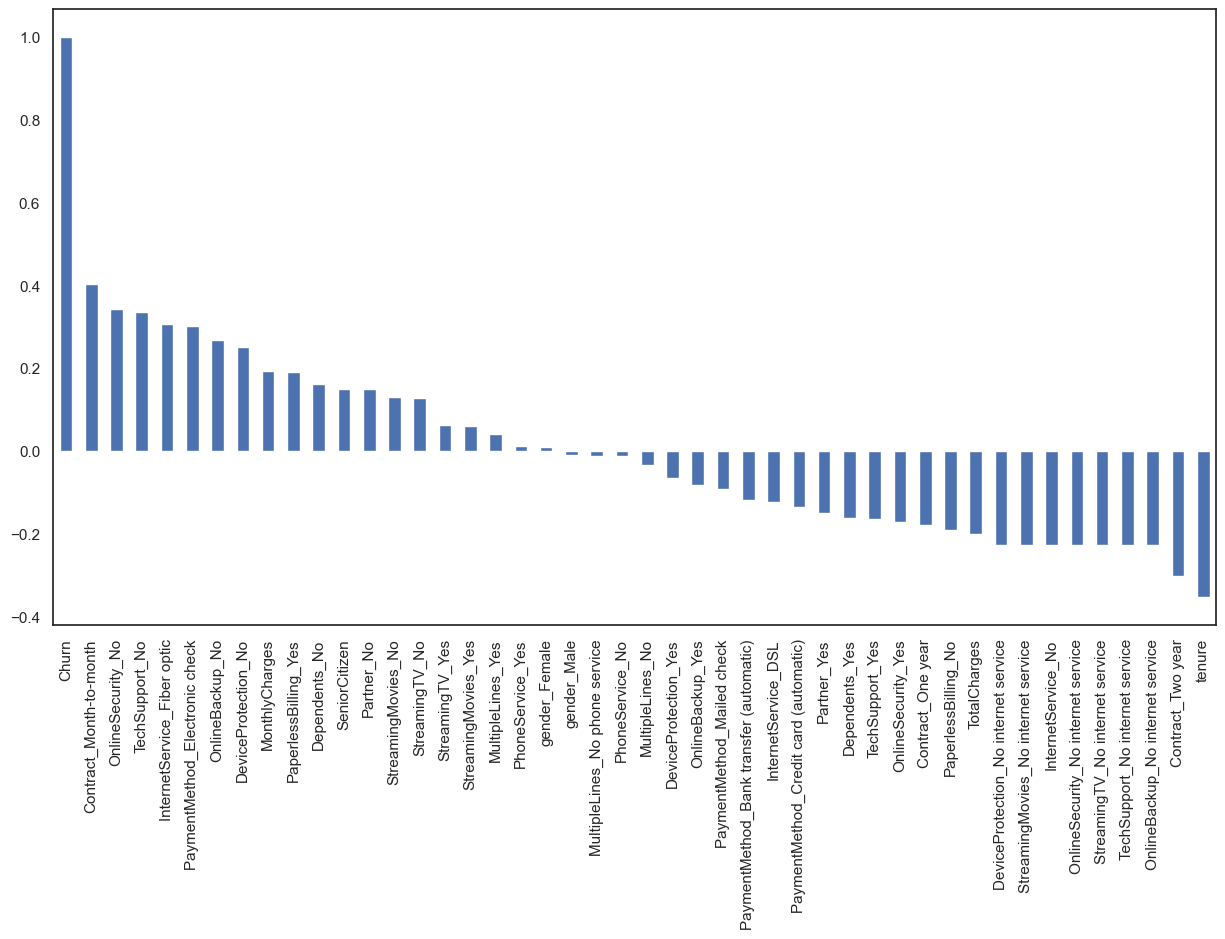

In [8]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Les contrats au mois, l'absence de sécurité en ligne et d'assistance technique semblent être positivement corrélés avec le taux d'attrition. En revanche, les contrats d'une durée de deux ans semblent avoir une corrélation négative avec le taux de désabonnement. 

Il est intéressant de noter que les services tels que la sécurité en ligne, la télévision en continu, la sauvegarde en ligne, l'assistance technique, etc. sans connexion internet semblent être négativement liés au taux de désabonnement.

Je vais explorer les modèles des corrélations ci-dessus avant de me plonger dans la modélisation et l'identification des variables importantes.

## Exploration des données

Je vais commencer par explorer mon ensemble de données, afin de mieux comprendre les schémas dans les données et éventuellement de formuler des hypothèses. Je commencerais par examiner la distribution des variables individuelles, puis je découperais mes données pour y déceler d'éventuelles tendances intéressantes.

**A.)** ***Démographie*** - Je m'interesse d'abord le sexe, la tranche d'âge, le partenaire et le statut de dépendance des clients.

1. **Distribution par sexe** - Environ la moitié des clients de notre ensemble de données sont des hommes et l'autre moitié des femmes.

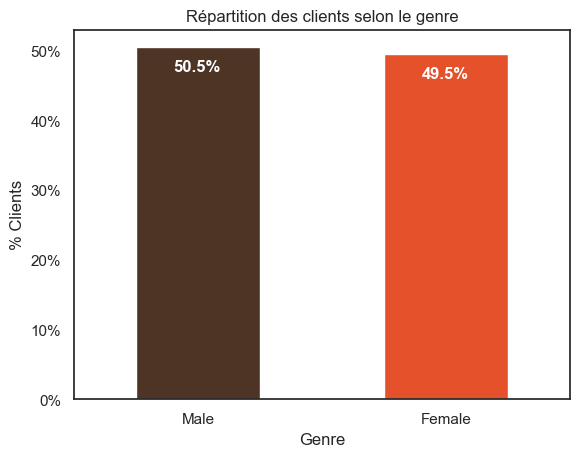

In [9]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('Genre')
ax.set_ylabel('% Clients')
ax.set_title('Répartition des clients selon le genre')

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

2. **% de personnes âgées** - Seuls 16% des clients sont des personnes âgées. La plupart de nos clients sont donc des jeunes.


Text(0.5, 1.0, '% de Clients seniors')

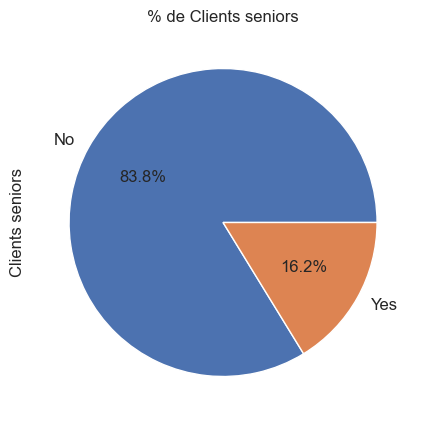

In [10]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Clients seniors',fontsize = 12)
ax.set_title('% de Clients seniors', fontsize = 12)

3. **Statut de partenaire et de personne à charge** - Environ 50 % des clients ont un partenaire, tandis que seulement 30 % du total des clients ont des personnes à charge.

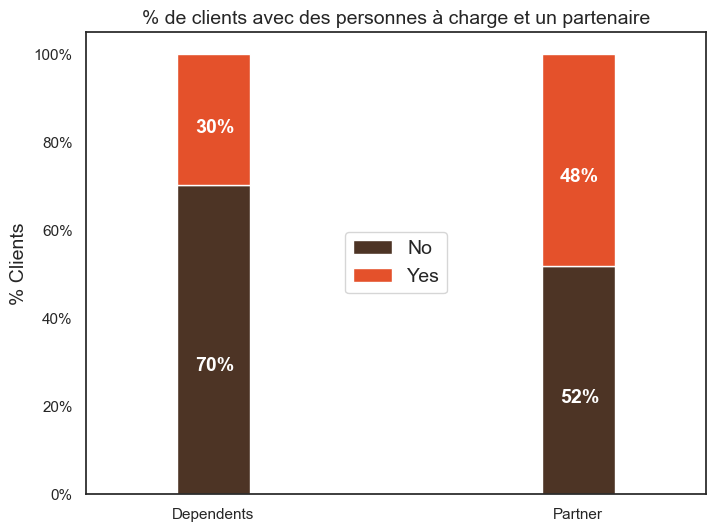

In [11]:
# Transformation du DataFrame pour regrouper les variables
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])

# Calcul du pourcentage de clients pour chaque valeur
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Clients',size = 14)
ax.set_xlabel('')
ax.set_title('% de clients avec des personnes à charge et un partenaire',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**Il serait intéressant d'examiner le pourcentage de clients qui ont des partenaires et qui ont également des personnes à charge. C'est ce que je vais étudier maintenant.**

Il est intéressant de noter que parmi les clients qui ont un partenaire, seule la moitié d'entre eux ont également une personne à charge, tandis que l'autre moitié n'a pas de personne à charge. 
En outre, comme prévu, la majorité (80 %) des clients qui n'ont pas de partenaire n'ont pas de personne à charge.

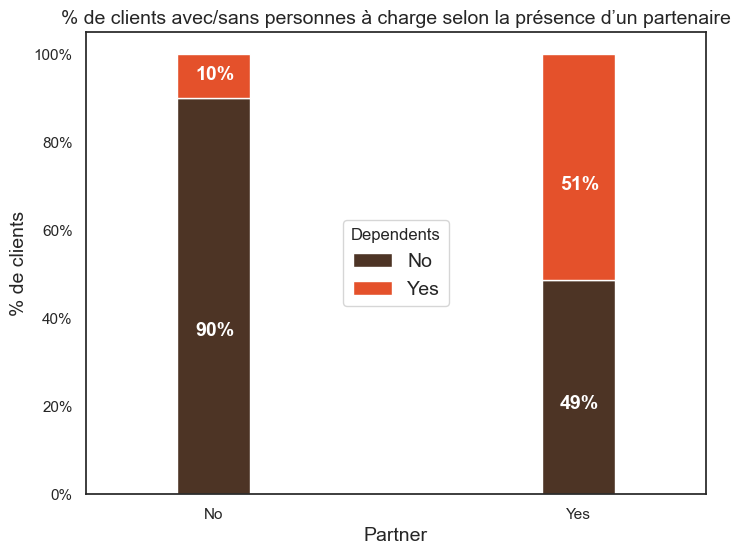

In [12]:
colors = ['#4D3425','#E4512B']

# Croisement des colonnes
partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% de clients',size = 14)
ax.set_title('% de clients avec/sans personnes à charge selon la présence d’un partenaire',size = 14)
ax.xaxis.label.set_size(14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

J'ai également examiné les différences éventuelles entre les pourcentages de clients avec/sans personnes à charge et partenaires par sexe. Il n'y a pas de différence dans leur répartition par sexe. En outre, il n'y a pas de différence dans le statut de personne âgée en fonction du sexe.

### B.) **Informations sur le compte client** :  Examination de la durée de validité, du contrat

**1. Durée d'utilisation:** L'examen de l'histogramme ci-dessous montre que de nombreux clients n'ont rejoint l'entreprise de télécommunications que depuis un mois, alors qu'un grand nombre d'entre eux sont là depuis environ 72 mois. Cela peut s'expliquer par le fait que les clients n'ont pas tous le même contrat. Ainsi, en fonction du contrat qu'ils ont souscrit, il pourrait être plus ou moins facile pour les clients de rester ou de quitter l'entreprise de télécommunications.

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_15976\2718652227.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False,


Text(0.5, 1.0, 'Nombre de clients selon leur ancienneté')

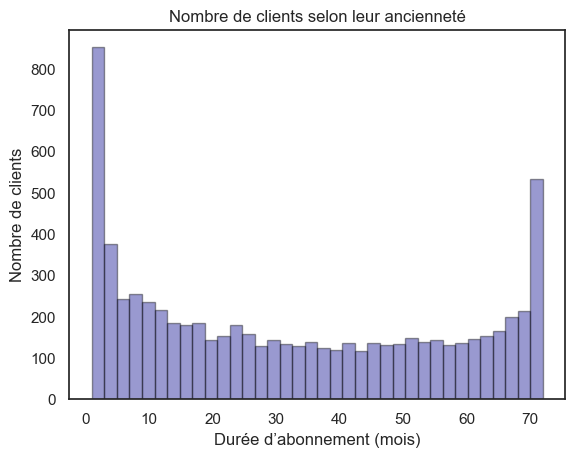

In [13]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Nombre de clients')
ax.set_xlabel('Durée d’abonnement (mois)')
ax.set_title('Nombre de clients selon leur ancienneté')

**2. Contrats:** Pour comprendre le graphique ci-dessus, il faut d'abord examiner le nombre de clients selon les différents contrats.

Text(0.5, 1.0, 'Nombre de clients selon le type de contrat')

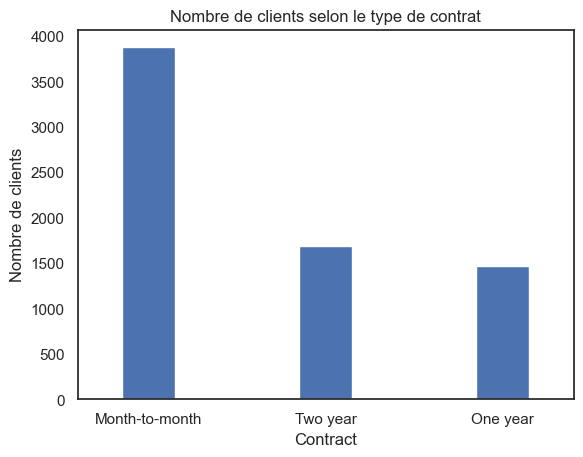

In [14]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Nombre de clients')
ax.set_title('Nombre de clients selon le type de contrat')

Comme on peut le voir sur ce graphique, la plupart des clients ont un contrat au mois. Il y a un nombre égal de clients dans les contrats d'un an et de deux ans.



Ci-dessous je verrais comment se répartissent les clients en fonction de leur type de contrat.

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_15976\427430913.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_15976\427430913.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

Text(0.5, 1.0, 'Contrat de deux ans')

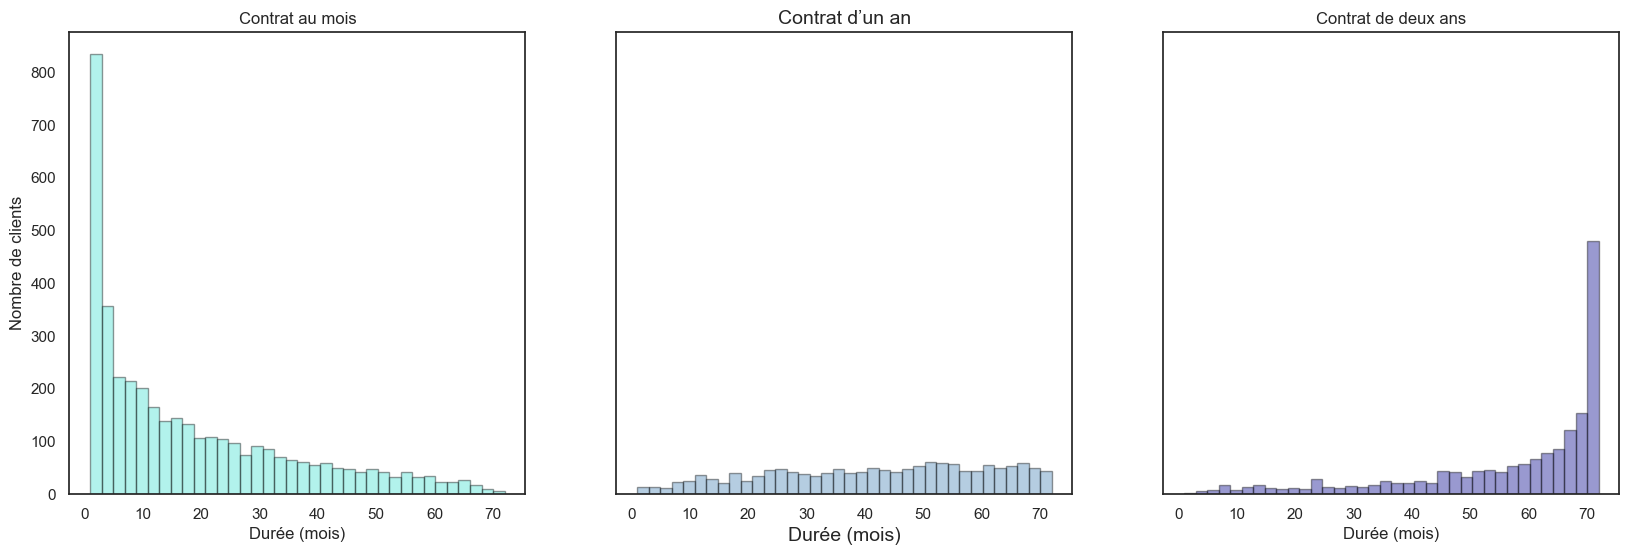

In [15]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('Nombre de clients')
ax.set_xlabel('Durée (mois)')
ax.set_title('Contrat au mois')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Durée (mois)',size = 14)
ax.set_title('Contrat d’un an',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Durée (mois)')
ax.set_title('Contrat de deux ans')

Il est intéressant de noter que la plupart des contrats mensuels ont une durée de 1 à 2 mois, alors que les contrats de 2 ans ont une durée d'environ 70 mois. Cela montre que les clients qui souscrivent un contrat plus long sont plus fidèles à l'entreprise et ont tendance à rester avec elle plus longtemps. 

C'est également ce que j'ai vu dans le graphique précédent sur la corrélation avec le taux de désabonnement.

### C. Examination de la répartition des différents services utilisés par les clients

In [16]:

telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

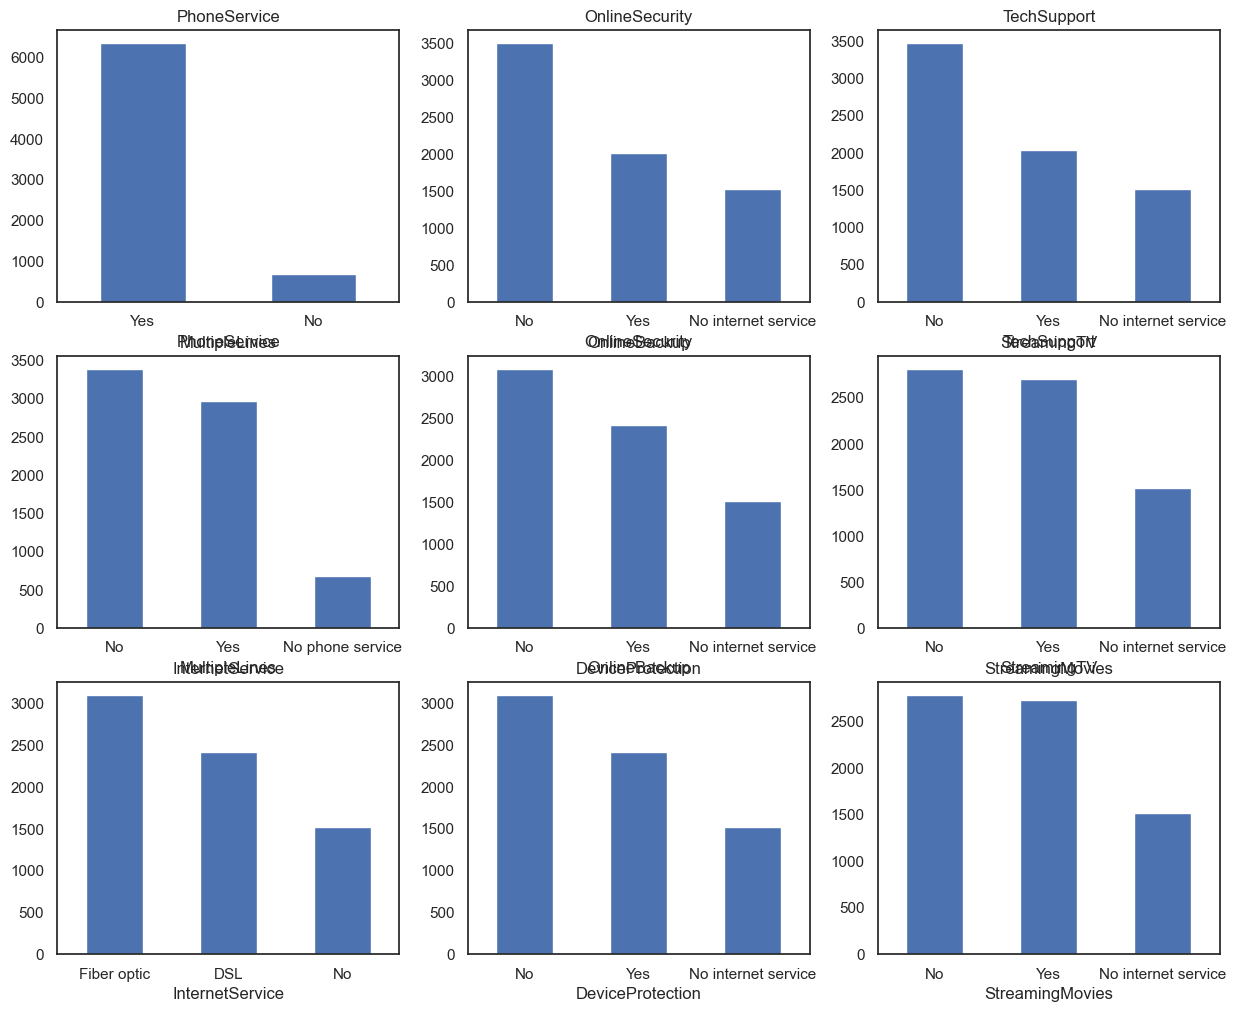

In [17]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

### D.) Examination de la relation entre les charges mensuelles et les charges totales

J'ai observé que le total des charges augmente à mesure que la facture mensuelle d'un client augmente.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

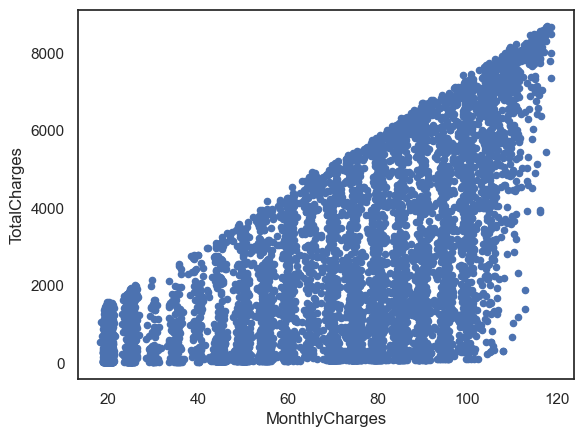

In [18]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

### E.) Enfin, je vais examiner notre variable prédictive (le taux de désabonnement) et comprendre son interaction avec d'autres variables importantes, comme le montre le graphique de corrélation.

1. Je vais d'abord examiner le taux de désistement dans mes données

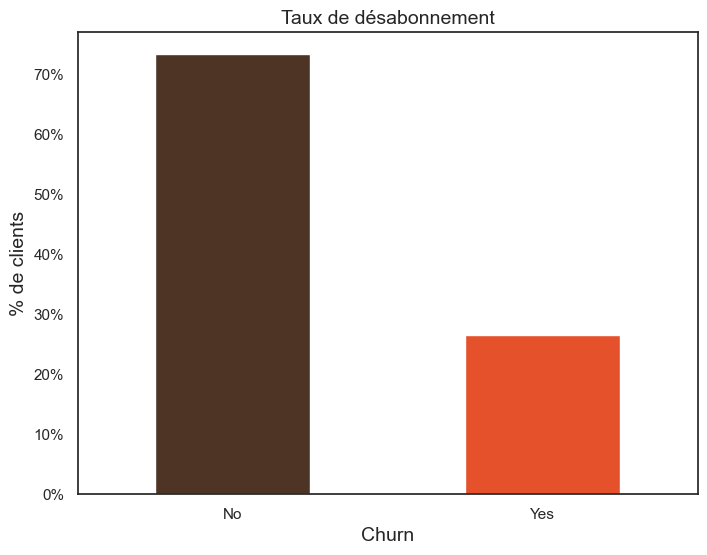

In [19]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% de clients',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Taux de désabonnement', size = 14)

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)


Dans mes données, 74 % des clients ne se désabonnent pas. Il est clair que les données sont faussées, car nous nous attendrions à ce qu'une grande majorité des clients ne se désabonnent pas. Il est important de garder cela à l'esprit pour ma modélisation, car l'asymétrie pourrait entraîner un grand nombre de faux négatifs. Je verrais dans la section consacrée à la modélisation comment éviter l'asymétrie des données.

2. Je vais maintenant explorer le taux d'attrition en fonction de la durée, de l'ancienneté, du type de contrat, des frais mensuels et des frais totaux pour voir comment il varie en fonction de ces variables.

**i.) Taux de désabonnement par rapport à l'ancienneté** : Comme le montre le graphique ci-dessous, les clients qui ne changent pas de fournisseur ont tendance à rester plus longtemps dans l'entreprise de télécommunications.

<Axes: xlabel='Churn', ylabel='tenure'>

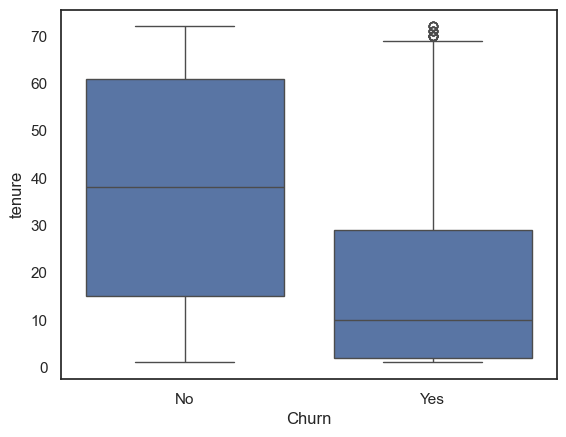

In [20]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

**ii.) Taux de désabonnement par type de contrat** : Comme dans le graphique de corrélation, les clients qui ont un contrat mensuel ont un taux de désabonnement très élevé.

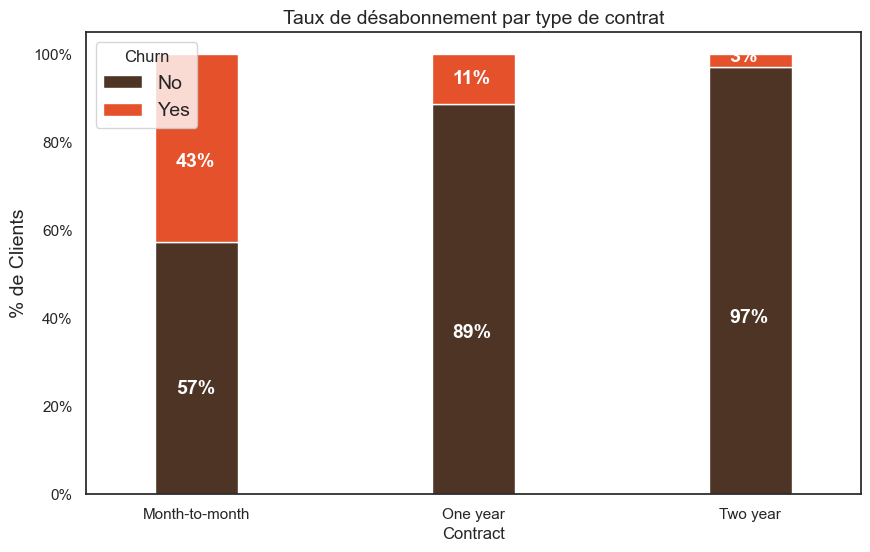

In [21]:
colors = ['#4D3425','#E4512B']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% de Clients',size = 14)
ax.set_title('Taux de désabonnement par type de contrat',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**iii.) Taux de désabonnement en fonction de l'ancienneté** : Les seniors ont un taux de désabonnement presque deux fois plus élevé que la population plus jeune.

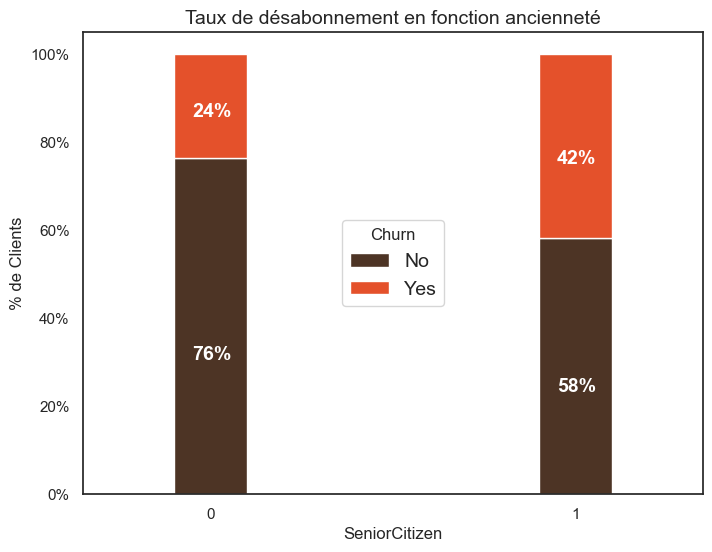

In [22]:
colors = ['#4D3425','#E4512B']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% de Clients')
ax.set_title('Taux de désabonnement en fonction ancienneté',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

**iv.) Désinvestissement en fonction des frais mensuels** : Le pourcentage de désabonnement est plus élevé lorsque les frais mensuels sont élevés.

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_15976\2037753920.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_15976\2037753920.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Désinvestissement en fonction des frais mensuels')

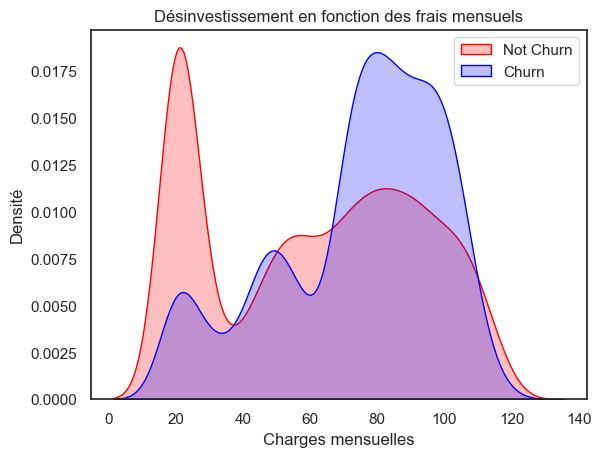

In [23]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Densité')
ax.set_xlabel('Charges mensuelles')
ax.set_title('Désinvestissement en fonction des frais mensuels')

**v.) Taux de désabonnement en fonction des frais totaux** : Il semble que le taux de désabonnement soit plus élevé lorsque les frais totaux sont moins élevés.

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_15976\4001797304.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_15976\4001797304.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Taux de désabonnement en fonction des frais totaux')

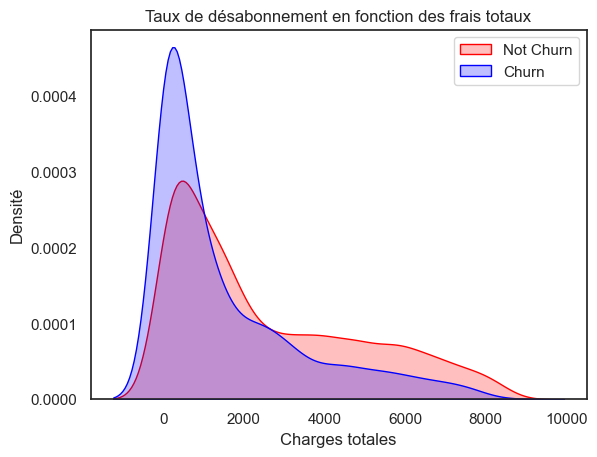

In [24]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Densité')
ax.set_xlabel('Charges totales')
ax.set_title('Taux de désabonnement en fonction des frais totaux')

## Après avoir explorer les données ci-dessus, je vais développer quelques modèles prédictifs et les comparer.

Je développerais Logistic Regression, SVM, ADA Boost and XG Boost

**1. Logistic Regression**

In [25]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

Il est important d'échelonner les variables dans la régression logistique de manière à ce qu'elles soient toutes comprises entre 0 et 1. Cela m'a permis d'améliorer la précision de 79,7 % à 80,7 %.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [28]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


Axes(0.125,0.11;0.775x0.77)


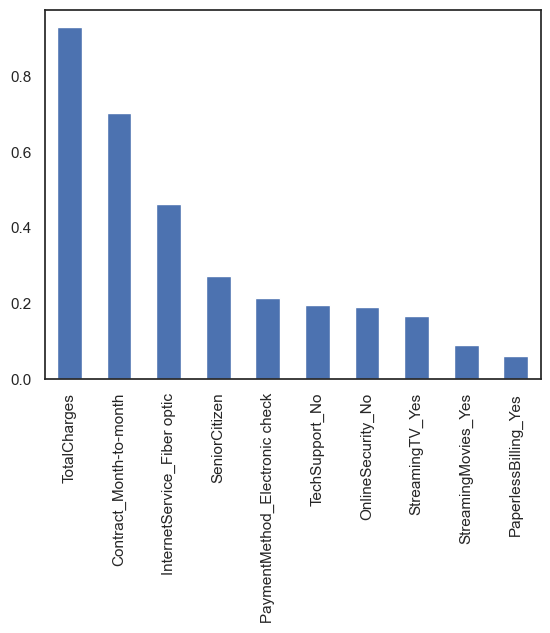

In [29]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))


Axes(0.125,0.11;0.775x0.77)


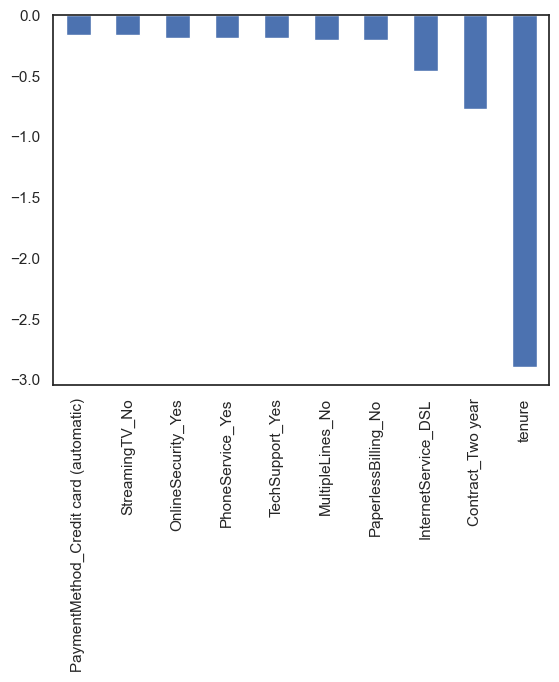

In [30]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

**Observations**

J'ai constaté que certaines variables ont une relation négative avec notre variable prédite (churn), tandis que d'autres ont une relation positive. Une relation négative signifie que la probabilité de désabonnement diminue avec cette variable. Ci-dessous, je résume quelques-unes des caractéristiques intéressantes :
* Comme nous l'avons vu dans notre exploration des données, le fait d'avoir un contrat de 2 mois réduit les risques de désengagement. Le contrat de 2 mois et l'ancienneté ont la relation la plus négative avec le désengagement, comme le prédisent les régressions logistiques
* Le fait de disposer d'un service internet DSL réduit également la probabilité de désengagement
* Enfin, le total des frais, les contrats mensuels, les services internet par fibre optique et l'ancienneté peuvent conduire à des taux de désengagement plus élevés. C'est intéressant parce que même si les services par fibre optique sont plus rapides, les clients sont susceptibles de se désabonner à cause de cela. Je pense que je dois approfondir mes recherches pour mieux comprendre les raisons de ce phénomène. 


**2. Support Vecor Machine (SVM)**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [32]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.820184790334044

In [ ]:
# Creation de la matrice de confusion
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

[[953  89]
 [164 201]]


Avec le SVM, j'ai pu augmenter la précision jusqu'à 82%.

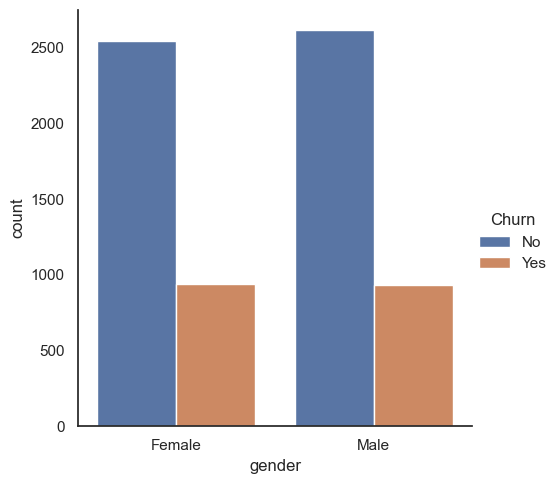

In [34]:
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=telecom_cust,
                  estimator=lambda x: sum(x==0)*100.0/len(x))
#ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

**3. ADA Boost**

In [35]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

c:\Users\Utilisateur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8159203980099502

**4. XG Boost**

In [36]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8009950248756219